# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [135]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [136]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [137]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [138]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
#     plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Загрузка данных 

In [139]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')
# data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

## Двухвальная установка без регенератора

### Загрузка данных

In [140]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

In [141]:
data_2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
16,NaN,1.0,0.996110,42.274539,8.084786,2.706018,2.695765,10.055749,2569.721576,9493.385998,1290
15,NaN,1.0,0.996862,42.741740,8.207414,2.745125,2.697668,10.430491,2601.254472,9529.821325,1300
14,NaN,1.0,0.997510,43.202611,8.329447,2.784292,2.699266,10.807971,2632.263244,9565.454906,1310
13,NaN,1.0,0.998064,43.657522,8.450941,2.823528,2.700581,11.187823,2662.746308,9600.332841,1320
12,NaN,1.0,0.998529,44.106468,8.571880,2.862818,2.701634,11.569687,2692.703069,9634.470312,1330
11,NaN,1.0,0.998913,44.549829,8.692320,2.902167,2.702449,11.953346,2722.143995,9667.911277,1340
10,NaN,1.0,0.999225,44.987953,8.812316,2.941583,2.703044,12.338589,2751.079211,9700.695214,1350
9,NaN,1.0,0.999470,45.420990,8.931881,2.981054,2.703444,12.725071,2779.508452,9732.845128,1360
8,NaN,1.0,0.999658,45.849443,9.051103,3.020592,2.703670,13.112635,2807.444995,9764.409699,1370
7,NaN,1.0,0.999795,46.273573,9.170021,3.060191,2.703747,13.501011,2834.893094,9795.417466,1380


### Построим общие характеристики установки

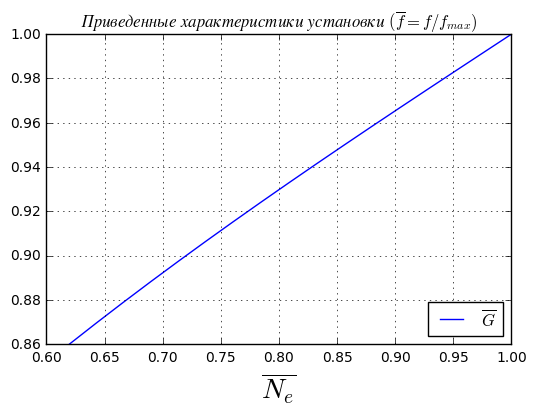

In [142]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

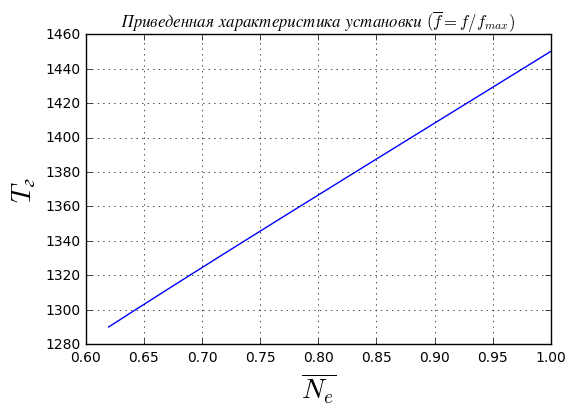

In [143]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [146]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

In [147]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
29,NaN,0.999980,0.970726,37.350544,5.129597,1.993651,2.275121,5.148188,2055.729980,8794.865029,0.921373,1160
28,NaN,0.999986,0.973517,37.924126,5.232262,2.027265,2.282176,5.450105,2095.155295,8849.254458,0.917106,1170
27,NaN,0.999990,0.976125,38.489007,5.334367,2.060890,2.288750,5.758556,2133.957668,8902.159966,0.912829,1180
26,NaN,0.999993,0.978555,39.044582,5.435808,2.094495,2.294854,6.073010,2172.113927,8953.582485,0.908552,1190
25,NaN,0.999995,0.980814,39.591523,5.536658,2.128106,2.300513,6.393432,2209.662455,9003.635946,0.904280,1200
24,NaN,0.999997,0.982909,40.129648,5.636870,2.161714,2.305739,6.719446,2246.600023,9052.351859,0.900021,1210
23,NaN,0.999998,0.984845,40.659166,5.736457,2.195323,2.310551,7.050836,2282.941556,9099.793639,0.895782,1220
22,NaN,0.999998,0.986629,41.179968,5.835382,2.228925,2.314963,7.387228,2318.685019,9145.992827,0.891569,1230
21,NaN,0.999999,0.988268,41.692430,5.933679,2.262531,2.318995,7.728456,2353.850333,9191.020566,0.887384,1240
20,NaN,0.999999,0.989767,42.196775,6.031365,2.296147,2.322663,8.074294,2388.449764,9234.931100,0.883229,1250


In [148]:
plt.plot(data_2nr.pi_c, data_2nr.t)
plt.grid()

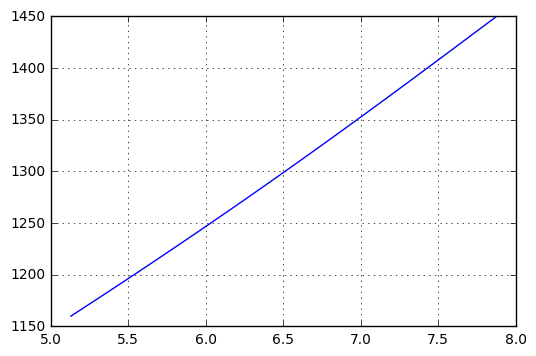

In [149]:
plt.show()

### Построим общие характеристики установки

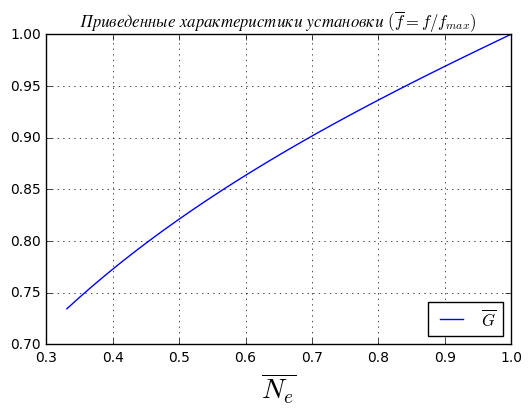

In [150]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

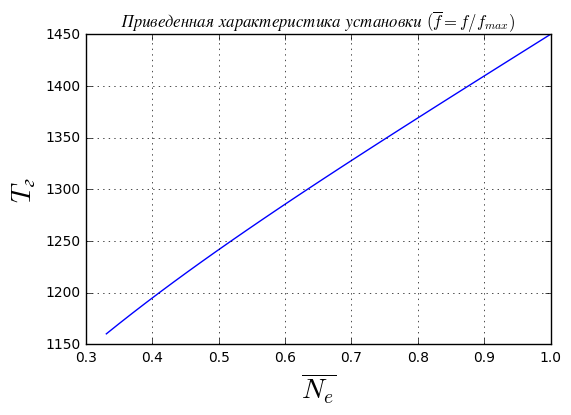

In [151]:
plot_characteristic(data_2nr.power, data_2nr.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

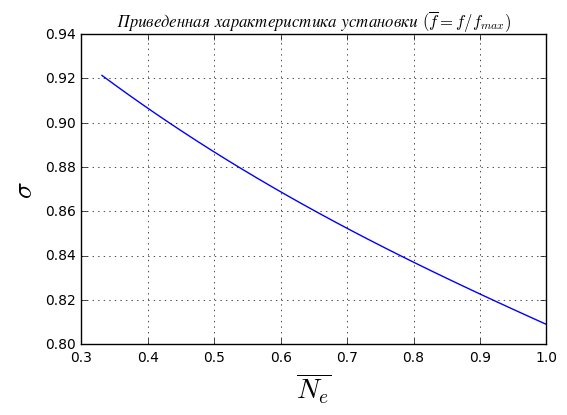

In [152]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

### Построим зависимость коэффициента восстановления от температуры в камере сгорания

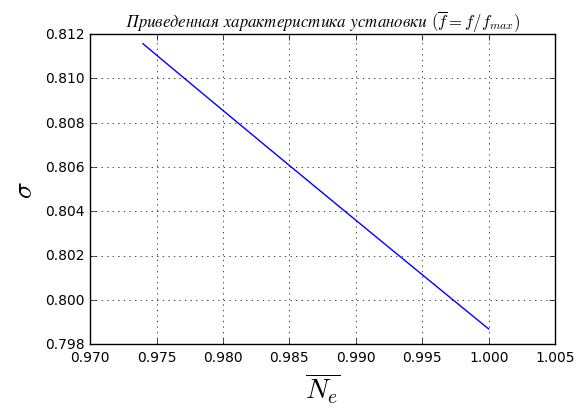

In [89]:
plot_characteristic(data_2nr.t, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [157]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

In [158]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.995843,1.0,1.0,47.149564,2.415792,2.351564,3.421377,9.781824,2543.652922,5756.941703,5551.573338,1290
15,NaN,0.996658,1.0,1.0,47.703255,2.452236,2.360766,3.462103,10.179208,2577.816223,5773.055733,5583.459615,1300
14,NaN,0.997359,1.0,1.0,48.248141,2.488684,2.370031,3.502064,10.579235,2611.328766,5789.024595,5614.685518,1310
13,NaN,0.997954,1.0,1.0,48.784502,2.525133,2.379345,3.541297,10.981544,2644.199903,5804.854089,5645.290451,1320
12,NaN,0.998453,1.0,1.0,49.312393,2.561568,2.388702,3.579812,11.385662,2676.428991,5820.549238,5675.297345,1330
11,NaN,0.998862,1.0,1.0,49.832298,2.597995,2.398094,3.617656,11.791312,2708.030847,5836.123071,5704.752026,1340
10,NaN,0.999193,1.0,1.0,50.344472,2.634408,2.407511,3.654860,12.198120,2739.011962,5851.581426,5733.685759,1350
9,NaN,0.999452,1.0,1.0,50.849084,2.670794,2.416944,3.691448,12.605683,2769.375958,5866.927630,5762.122940,1360
8,NaN,0.999648,1.0,1.0,51.346725,2.707164,2.426388,3.727472,13.013801,2799.141042,5882.178515,5790.110221,1370
7,NaN,0.999791,1.0,1.0,51.837726,2.743510,2.435830,3.762974,13.422149,2828.315135,5897.337254,5817.679010,1380


### Построим общие характеристики установки

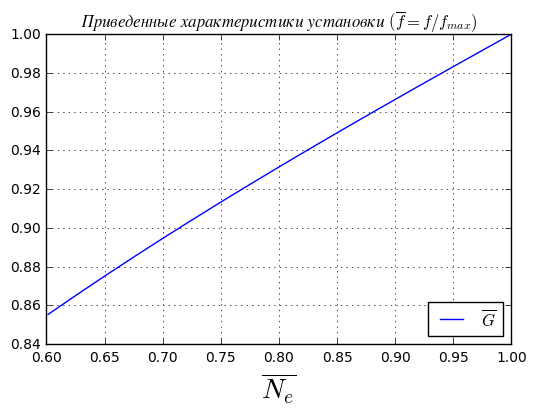

In [159]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

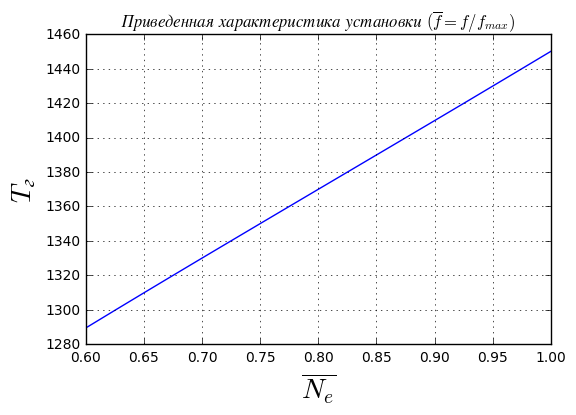

In [160]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [127]:
data_3nс = pd.read_json(data_root + '3nc.json').sort_values('t')

In [128]:
data_3nс

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.991876,1.0,1.0,35.336810,2.831494,2.246152,3.372388,8.822287,2468.457453,5796.462851,5432.751917,1290
15,NaN,0.993539,1.0,1.0,35.990598,2.890613,2.261038,3.426195,9.293298,2511.828933,5807.539247,5476.293728,1300
14,NaN,0.994946,1.0,1.0,36.624927,2.949199,2.275895,3.477956,9.763989,2553.744477,5818.567713,5518.440565,1310
13,NaN,0.996122,1.0,1.0,37.240421,3.007251,2.290720,3.527754,10.233583,2594.254460,5829.546142,5559.287684,1320
12,NaN,0.997092,1.0,1.0,37.838062,3.064790,2.305516,3.575695,10.701547,2633.422695,5840.480973,5598.941357,1330
11,NaN,0.997879,1.0,1.0,38.418789,3.121835,2.320281,3.621886,11.167350,2671.305394,5851.374398,5637.496236,1340
10,NaN,0.998505,1.0,1.0,38.983440,3.178394,2.335015,3.666420,11.630485,2707.954047,5862.227662,5675.032468,1350
9,NaN,0.998990,1.0,1.0,39.533114,3.234494,2.349713,3.709421,12.090629,2743.427809,5873.039777,5711.642371,1360
8,NaN,0.999355,1.0,1.0,40.068889,3.290163,2.364379,3.750999,12.547505,2777.782968,5883.816775,5747.411060,1370
7,NaN,0.999617,1.0,1.0,40.591912,3.345434,2.379009,3.791276,13.000932,2811.076784,5894.559468,5782.425777,1380


### Построим общие характеристики установки

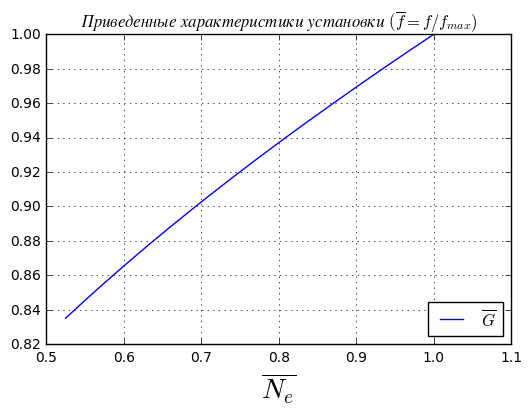

In [129]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

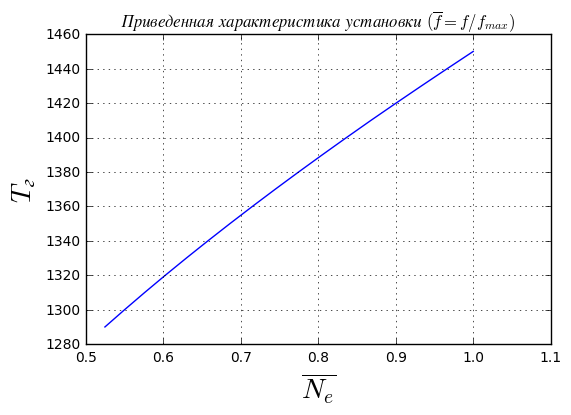

In [130]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [161]:
data_3nb = pd.read_json(data_root + '3nb.json').sort_values('t')

In [162]:
data_3nb

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.997643,0.999879,1.0,40.630464,2.565896,2.073784,3.803959,11.200104,2678.656440,5471.434056,5636.919723,1290
15,NaN,0.998170,0.999902,1.0,41.210366,2.601508,2.099926,3.825654,11.549534,2706.412619,5507.405390,5656.419107,1300
14,NaN,0.998612,0.999921,1.0,41.787092,2.637146,2.126347,3.846410,11.898097,2733.556145,5543.141512,5677.022597,1310
13,NaN,0.998975,0.999938,1.0,42.358813,2.672685,2.153029,3.866115,12.244402,2760.013075,5578.636538,5698.654442,1320
12,NaN,0.999268,0.999952,1.0,42.923691,2.707999,2.179956,3.884659,12.586765,2785.692845,5613.891678,5721.215692,1330
11,NaN,0.999496,0.999964,1.0,43.479729,2.742944,2.207102,3.901928,12.923738,2810.528043,5648.901948,5744.578915,1340
10,NaN,0.999669,0.999974,1.0,44.025072,2.777386,2.234448,3.917828,13.253880,2834.455661,5683.669367,5768.601395,1350
9,NaN,0.999795,0.999981,1.0,44.557791,2.811182,2.261965,3.932269,13.575873,2857.424568,5718.186981,5793.116691,1360
8,NaN,0.999883,0.999987,1.0,45.076253,2.844208,2.289627,3.945186,13.888257,2879.375962,5752.456383,5817.954932,1370
7,NaN,0.999939,0.999992,1.0,45.579008,2.876351,2.317410,3.956534,14.190056,2900.286195,5786.477317,5842.942194,1380


### Построим общие характеристики установки

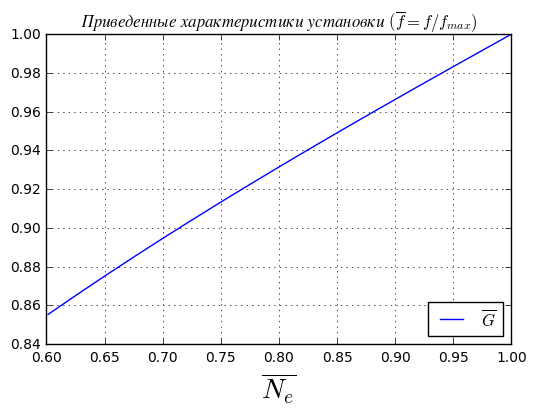

In [163]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

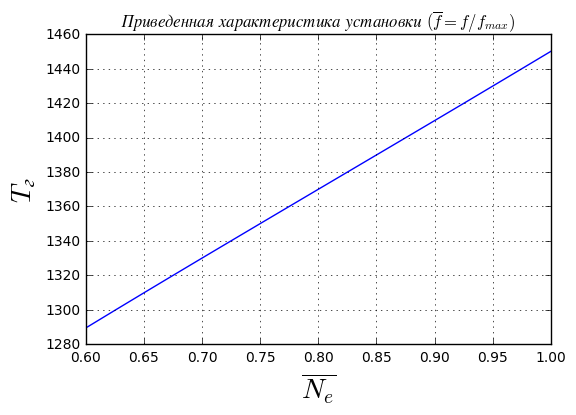

In [164]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()